In [1]:
#CARGA DE PAQUETES
import cv2
import pytesseract
import matplotlib.pyplot as plt 
#para uso en windows 
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


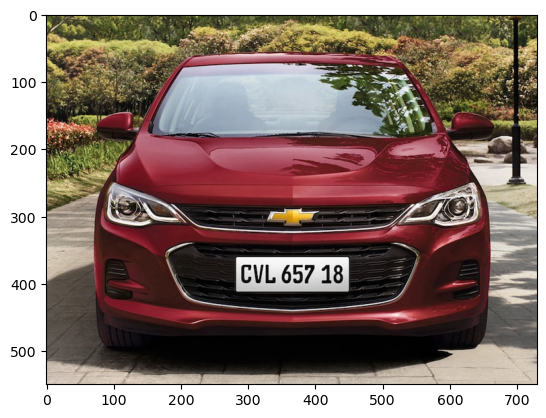

In [2]:
placa = []
image = cv2.imread('./auto.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(gray)

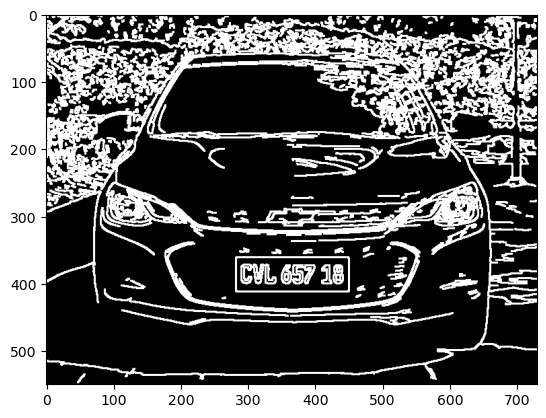

In [3]:
gray = cv2.blur(gray,(3,3))
#canny lo paso a negro y resalto los bordes 
canny = cv2.Canny(gray,150,200)
canny = cv2.dilate(canny,None,iterations=1)
plt.imshow(canny,cmap='gray');

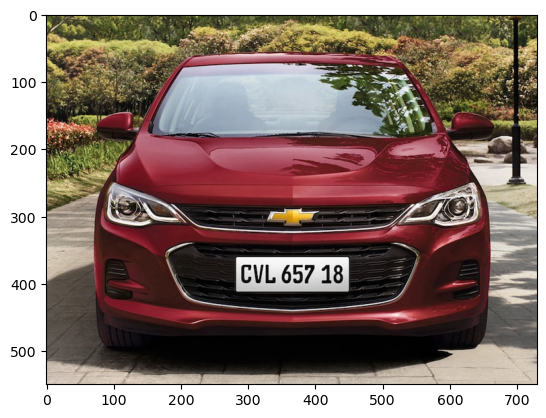

In [4]:
#Deteccion de contornos con openCV4 
contorno, _ = cv2.findContours(canny, cv2.RETR_LIST,
                              cv2.CHAIN_APPROX_SIMPLE) #CHAIN APROX SIMPLE DETECTA LINEAS IZQ Y DER
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB));

In [11]:
for c in contorno:
    area = cv2.contourArea(c)
    ##print(area) imprime todas las areas que se encuentran en la imagen 
    x,y,w,h = cv2.boundingRect(c)
    epsilon = 0.09 * cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, epsilon, True)
    if len(approx) == 4 and area > 9000:
        print('area:',area)
        print('w:',w)
        print('h:',h)
        aspect_ratio = float(w)/h
        print('Relacion de aspecto', aspect_ratio)
        cv2.drawContours(image,[approx],0,(0,255,0),3)#generamos linea y luego colocamos en la imagen xd 
        if aspect_ratio > 3:
            placa = gray[y:y+h, x:x+w]
            text = pytesseract.image_to_string(placa,config = '--psm 11').strip() #pystesseract lee lo de la imagen
            print('PLACA:', text) 
            cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0),3)
            cv2.putText(image,text, (x-20, y-10),1,2.2,(0,255,0),3)

area: 9007.0
w: 171
h: 54
Relacion de aspecto 3.1666666666666665
PLACA: CVL 657 18


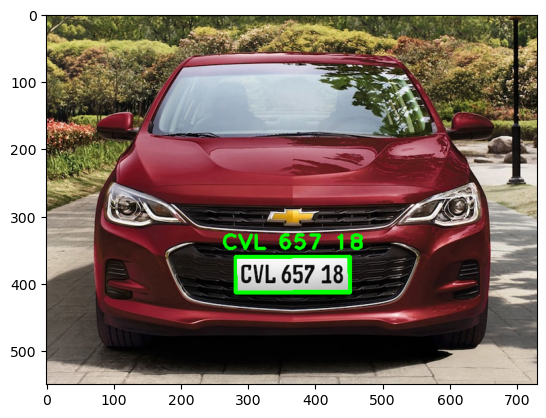

In [12]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) ## muestra las lineas del contorno de la placa